# Pré-processamento e visualização preliminar

Este notebook é utilizado tanto para visualização quanto pré-processamento dos dados de entrada.

### Imports e configurações iniciais

In [1]:
# Se necessário (usando kernel conda_amazonei_tensorflow2_p36 do Sagemaker)
%pip install wordcloud
%pip install stanza

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
Note: you may need to restart the kernel to use updated packages.
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
Note: you may need to restart the kernel to use updated packages.


In [1]:
from python_scripts.save_load import load_df_from_bucket, save_df_to_s3_bucket
from python_scripts.plots import plot_cloud
from python_scripts.processing import create_tokenized_df

### Visualizações com dados crus

In [2]:
file_name = 'dados_brutos.csv'
raw_data = load_df_from_bucket(file_name, tipo='bruto')
raw_data.head()

,fake,text
0,0,A divisão do STF ao meio entre partidários e ...
1,1,"General manda recado para STF: ""Abaixaram as c..."
2,1,O Nordeste acordou! Lula e o PT são enxotados:...
3,0,"Dois relatórios da Polícia Federal, com análi..."
4,1,Coreia do Norte declara status de QUASE-GUERRA...


In [3]:
raw_words =' '.join([text for text in raw_data.text])

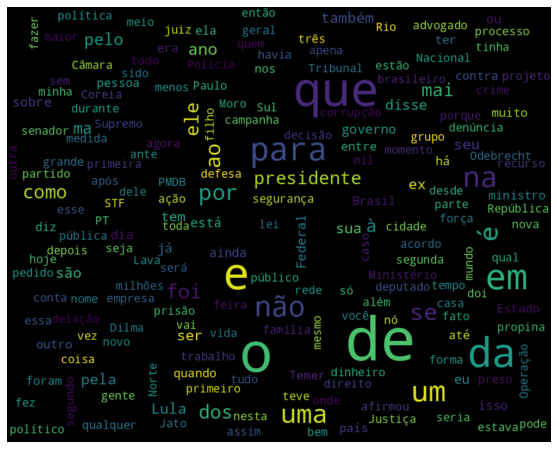

In [4]:
plot_cloud(raw_words)

Como é de se esperar, as contagens de palavras são dominadas por stopwords, palavras com pouco significado para os textos. 

### Visualização com dados processados

Para uma análise mais eficaz, é necessário eliminar as stopwords. Durante esta limpeza, também serão removidos sinais de pontuação, acentos e outros caracteres especiais e todas as palavras serão padronizadas para utilizar letras minúsculas apenas. Após esta limpeza, será feita uma nova visualização dos dados.

In [27]:
processed_df = create_tokenized_df(raw_data)

Processando linhas 0 a 19...


/home/ec2-user/anaconda3/envs/amazonei_tensorflow2_p36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/ec2-user/anaconda3/envs/amazonei_tensorflow2_p36/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Processando linhas 20 a 39...
Processando linhas 40 a 59...
Processando linhas 60 a 79...
Processando linhas 80 a 99...
Processando linhas 100 a 119...
Processando linhas 120 a 139...
Processando linhas 140 a 159...
Processando linhas 160 a 179...
Processando linhas 180 a 199...
Processando linhas 200 a 219...
Processando linhas 220 a 239...
Processando linhas 240 a 259...
Processando linhas 260 a 279...
Processando linhas 280 a 299...
Processando linhas 300 a 319...
Processando linhas 320 a 339...
Processando linhas 340 a 359...
Processando linhas 360 a 379...
Processando linhas 380 a 399...
Processando linhas 400 a 419...
Processando linhas 420 a 439...
Processando linhas 440 a 459...
Processando linhas 460 a 479...
Processando linhas 480 a 499...
Processando linhas 500 a 519...
Processando linhas 520 a 539...
Processando linhas 540 a 559...
Processando linhas 560 a 579...
Processando linhas 580 a 599...
Processando linhas 600 a 619...
Processando linhas 620 a 639...
Processando linh

In [34]:
processed_df['words_str'] = processed_df['words'].apply(lambda x: ' '.join(x))
processed_df['lemmas_str'] = processed_df['lemmas'].apply(lambda x: ' '.join(x))

In [7]:
processed_df.head()

,fake,text,words,lemmas,avg_sent_len,avg_word_len,words_str,lemmas_str
0,0,A divisão do STF ao meio entre partidários e ...,"['divisão', 'STF', 'meio', 'partidários', 'ind...","['divisão', 'STF', 'meio', 'partidário', 'inde...",10.747664,6.690641,divisão STF meio partidários independentes fic...,divisão STF meio partidário independente ficar...
1,1,"General manda recado para STF: ""Abaixaram as c...","['General', 'manda', 'recado', 'STF', 'Abaixar...","['general', 'mandar', 'recado', 'STF', 'abaixa...",11.000000,6.461584,General manda recado STF Abaixaram calças Cong...,general mandar recado STF abaixar calça congre...
2,1,O Nordeste acordou! Lula e o PT são enxotados:...,"['Nordeste', 'acordou', 'Lula', 'PT', 'enxotad...","['nordeste', 'acordar', 'Lula', 'PT', 'enxotar...",7.333333,6.565873,Nordeste acordou Lula PT enxotados Chega bande...,nordeste acordar Lula PT enxotar chegar bandei...
3,0,"Dois relatórios da Polícia Federal, com análi...","['Dois', 'relatórios', 'Polícia', 'Federal', '...","['dois', 'relatório', 'Polícia', 'Federal', 'a...",17.000000,7.237319,Dois relatórios Polícia Federal análises mater...,dois relatório Polícia Federal análise materia...
4,1,Coreia do Norte declara status de QUASE-GUERRA...,"['Coreia', 'Norte', 'declara', 'status', 'QUAS...","['Coreia', 'Norte', 'declarar', 'status', 'QUA...",11.666667,6.513799,Coreia Norte declara status QUASE-GUERRA mobil...,Coreia Norte declarar status QUASE-GUERRA mobi...


In [8]:
processed_words = ' '.join([row for row in processed_df['words_str']])

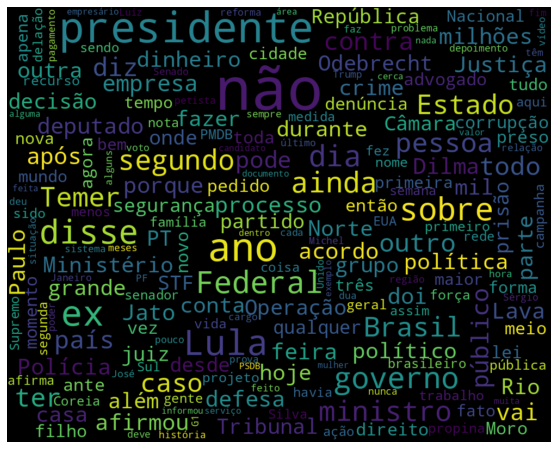

In [9]:
plot_cloud(processed_words)

In [12]:
processed_lemmas = ' '.join([row for row in processed_df['lemmas_str']])

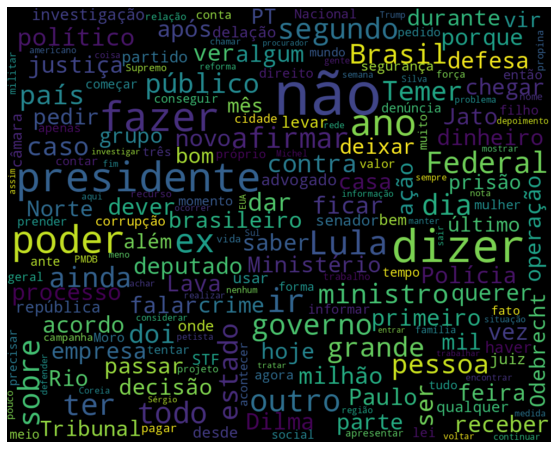

In [13]:
plot_cloud(processed_lemmas)

Com o pré-processamento, nota-se que restam palavras mais significativas nos textos. Em particular, nota-se que os textos da base parecem enfatizar assuntos políticos.

Os dados pré-processados são então salvos para que possam ser utilizados no treinamento e validação de modelos.

In [15]:
processed_file = 'dados_processados.csv'
processed_bucket = 'projetointerdisciplinardadosprocessados'

# Salvar tudo no S3 (armazenamento não é problema)
save_df_to_s3_bucket(processed_df, file_name=processed_file, tipo='processado')

# Remover colunas de strings antes de salvar, economizar espaço (GitHub aceita só até 100 MB)
for column_name in ['words_str', 'lemmas_str']:
    if column_name in processed_df.columns:
        processed_df = processed_df.drop(column_name, axis=1)

processed_df.to_csv(processed_file, encoding='utf-8', index=False)